<a href="https://colab.research.google.com/github/Tanmayrajput8/CEP_PROJECT/blob/main/prodigy_Infotech_Task_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
url = "https://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=csv"

In [4]:
from google.colab import files
uploaded = files.upload()


Saving API_SP.POP.TOTL_DS2_en_csv_v2_383394.csv to API_SP.POP.TOTL_DS2_en_csv_v2_383394.csv
Saving Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_383394.csv to Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_383394.csv
Saving Metadata_Indicator_API_SP.POP.TOTL_DS2_en_csv_v2_383394.csv to Metadata_Indicator_API_SP.POP.TOTL_DS2_en_csv_v2_383394.csv


In [6]:
df = pd.read_csv("API_SP.POP.TOTL_DS2_en_csv_v2_383394.csv", skiprows=4)

In [7]:
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54922.0,55578.0,56320.0,57002.0,57619.0,58190.0,...,108727.0,108735.0,108908.0,109203.0,108587.0,107700.0,107310.0,107359.0,NaN,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130072080.0,133534923.0,137171659.0,140945536.0,144904094.0,149033472.0,...,623369401.0,640058741.0,657801085.0,675950189.0,694446100.0,713090928.0,731821393.0,750503764.0,NaN,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,9035043.0,9214083.0,9404406.0,9604487.0,9814318.0,10036008.0,...,34700612.0,35688935.0,36743039.0,37856121.0,39068979.0,40000412.0,40578842.0,41454761.0,NaN,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97630925.0,99706674.0,101854756.0,104089175.0,106388440.0,108772632.0,...,429454743.0,440882906.0,452195915.0,463365429.0,474569351.0,485920997.0,497387180.0,509398589.0,NaN,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5231654.0,5301583.0,5354310.0,5408320.0,5464187.0,5521981.0,...,29183070.0,30234839.0,31297155.0,32375632.0,33451132.0,34532429.0,35635029.0,36749906.0,NaN,NaN


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 70 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            264 non-null    float64
 5   1961            264 non-null    float64
 6   1962            264 non-null    float64
 7   1963            264 non-null    float64
 8   1964            264 non-null    float64
 9   1965            264 non-null    float64
 10  1966            264 non-null    float64
 11  1967            264 non-null    float64
 12  1968            264 non-null    float64
 13  1969            264 non-null    float64
 14  1970            264 non-null    float64
 15  1971            264 non-null    float64
 16  1972            264 non-null    float64
 17  1973            264 non-null    flo

In [9]:
countries = ['India', 'China', 'United States', 'Brazil', 'Nigeria']
df_subset = df[df['Country Name'].isin(countries)]
df_subset = df_subset[['Country Name', '2020', '2015', '2010']]
df_subset


,Country Name,2020,2015,2010
29,Brazil,2.086608e+08,2.016755e+08,1.937019e+08
40,China,1.411100e+09,1.379860e+09,1.337705e+09
109,India,1.402618e+09,1.328024e+09,1.243482e+09
174,Nigeria,2.139962e+08,1.906719e+08,1.666429e+08
251,United States,3.315269e+08,3.207390e+08,3.093271e+08


In [10]:
df_melted = df_subset.melt(id_vars='Country Name', var_name='Year', value_name='Population')
df_melted.head()


,Country Name,Year,Population
0,Brazil,2020,2.086608e+08
1,China,2020,1.411100e+09
2,India,2020,1.402618e+09
3,Nigeria,2020,2.139962e+08
4,United States,2020,3.315269e+08


In [11]:
df_melted['Year'] = df_melted['Year'].astype(int)
df_melted['Population'] = pd.to_numeric(df_melted['Population'])


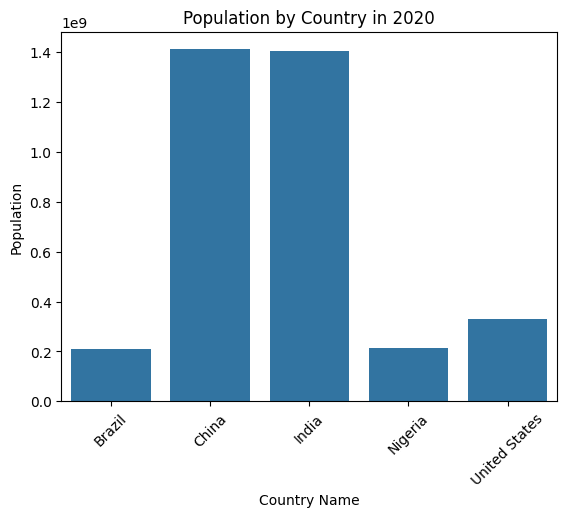

In [12]:
df_2020 = df_melted[df_melted['Year'] == 2020]
sns.barplot(x='Country Name', y='Population', data=df_2020)
plt.title("Population by Country in 2020")
plt.xticks(rotation=45)
plt.show()


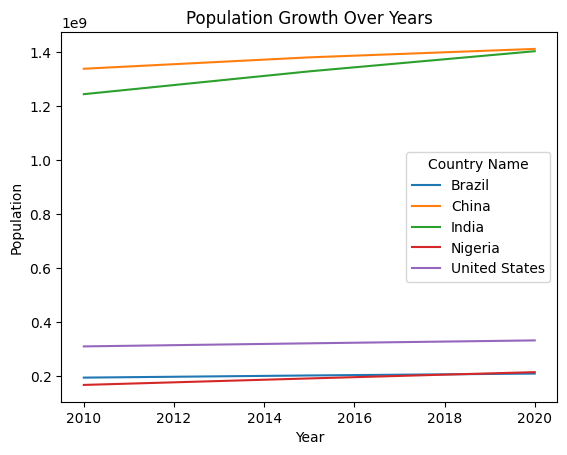

In [13]:
sns.lineplot(x='Year', y='Population', hue='Country Name', data=df_melted)
plt.title("Population Growth Over Years")
plt.show()


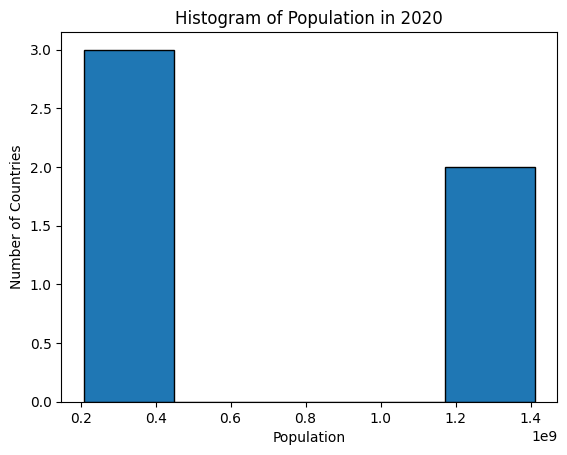

In [14]:
plt.hist(df_2020['Population'], bins=5, edgecolor='black')
plt.title("Histogram of Population in 2020")
plt.xlabel("Population")
plt.ylabel("Number of Countries")
plt.show()


In [15]:
max_pop = df_2020[df_2020['Population'] == df_2020['Population'].max()]
max_pop


,Country Name,Year,Population
1,China,2020,1.411100e+09


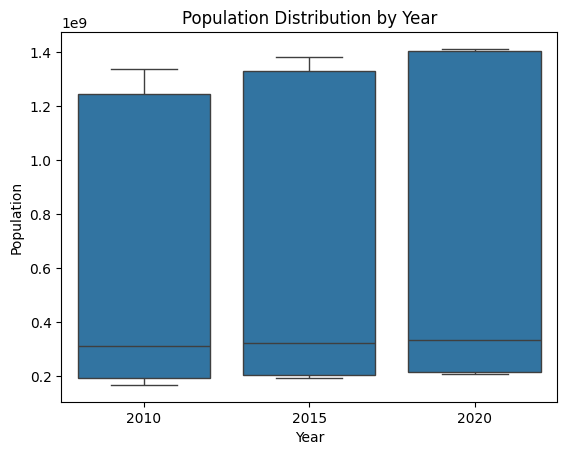

In [16]:
sns.boxplot(x='Year', y='Population', data=df_melted)
plt.title("Population Distribution by Year")
plt.show()


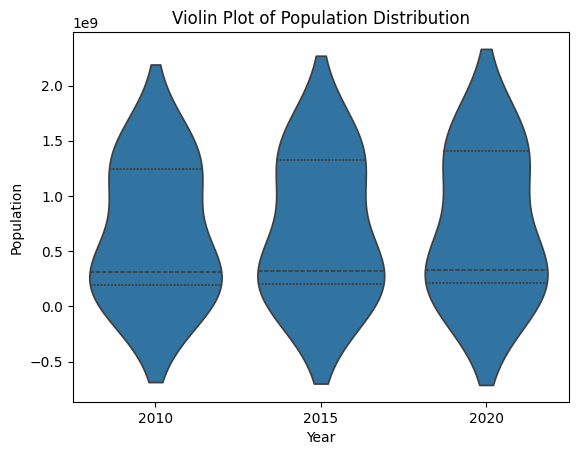

In [17]:
sns.violinplot(x='Year', y='Population', data=df_melted, inner='quartile')
plt.title("Violin Plot of Population Distribution")
plt.show()


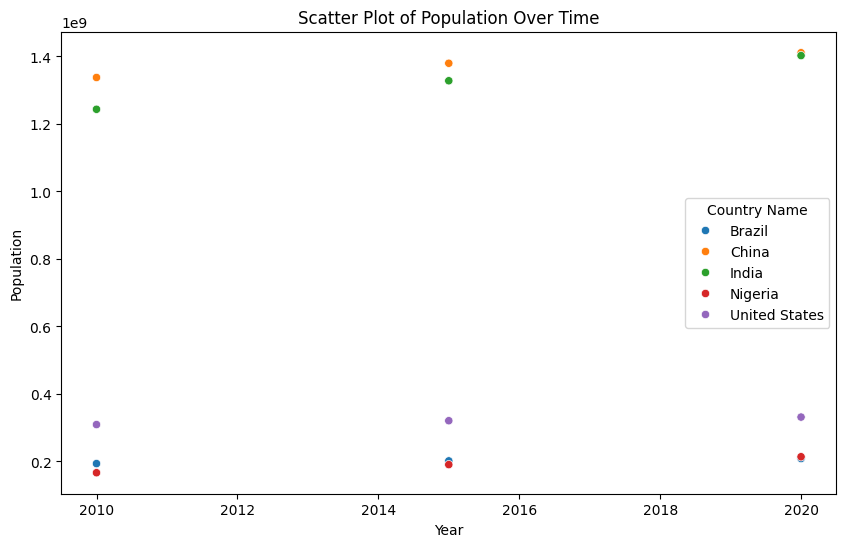

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Year', y='Population', hue='Country Name', data=df_melted)
plt.title("Scatter Plot of Population Over Time")
plt.show()


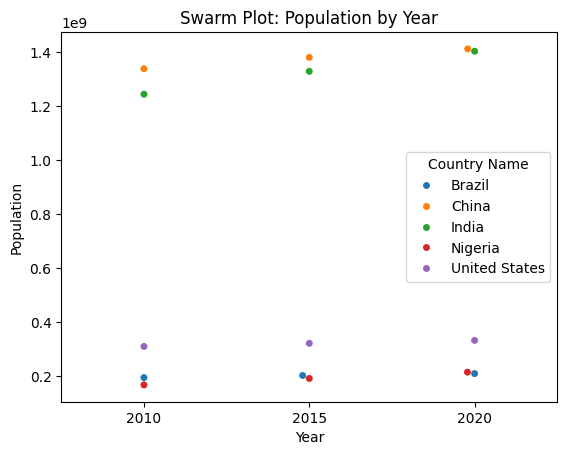

In [19]:
sns.swarmplot(x='Year', y='Population', hue='Country Name', data=df_melted)
plt.title("Swarm Plot: Population by Year")
plt.show()


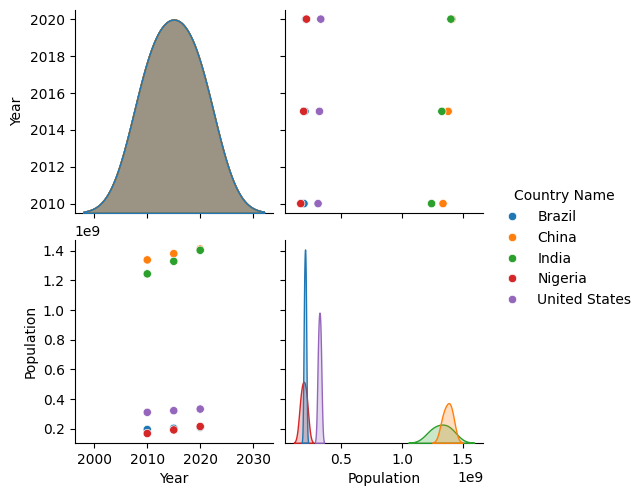

In [20]:
sns.pairplot(df_melted, hue='Country Name')


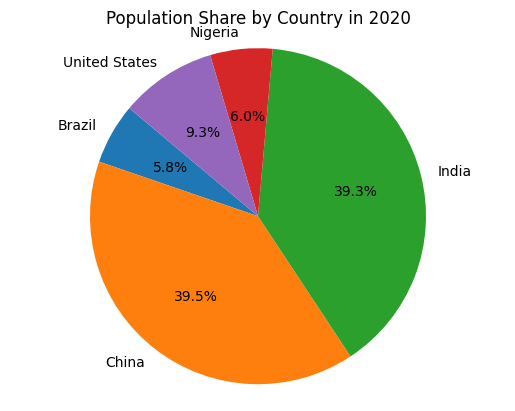

In [21]:

plt.pie(df_2020['Population'], labels=df_2020['Country Name'], autopct='%1.1f%%', startangle=140)
plt.title("Population Share by Country in 2020")
plt.axis('equal')  # Equal aspect ratio for a perfect circle
plt.show()


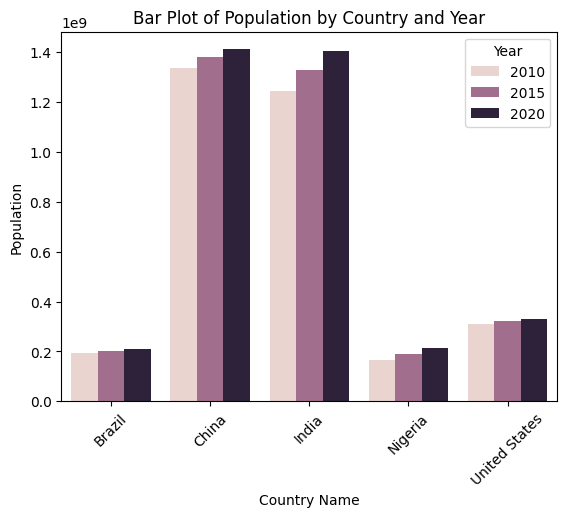

In [22]:
sns.barplot(x='Country Name', y='Population', hue='Year', data=df_melted)
plt.title("Bar Plot of Population by Country and Year")
plt.xticks(rotation=45)
plt.show()
